    trueclassrate  cutoff
34       0.728324    0.35
35       0.728324    0.36
36       0.728324    0.37
37       0.728324    0.38
38       0.728324    0.39
39       0.728324    0.40
40       0.728324    0.41
41       0.728324    0.42
42       0.728324    0.43
43       0.728324    0.44
44       0.728324    0.45
45       0.728324    0.46
46       0.728324    0.47
47       0.728324    0.48
48       0.728324    0.49
49       0.728324    0.50
50       0.728324    0.51
51       0.728324    0.52
52       0.728324    0.53
53       0.728324    0.54
54       0.728324    0.55
55       0.728324    0.56
56       0.728324    0.57
57       0.728324    0.58
58       0.728324    0.59
59       0.728324    0.60
60       0.728324    0.61
61       0.728324    0.62
    trueclassrate  cutoff
33       0.728324    0.34
34       0.728324    0.35
35       0.728324    0.36
36       0.728324    0.37
37       0.728324    0.38
38       0.728324    0.39
39       0.728324    0.40
40       0.728324    0.41
41       0.7

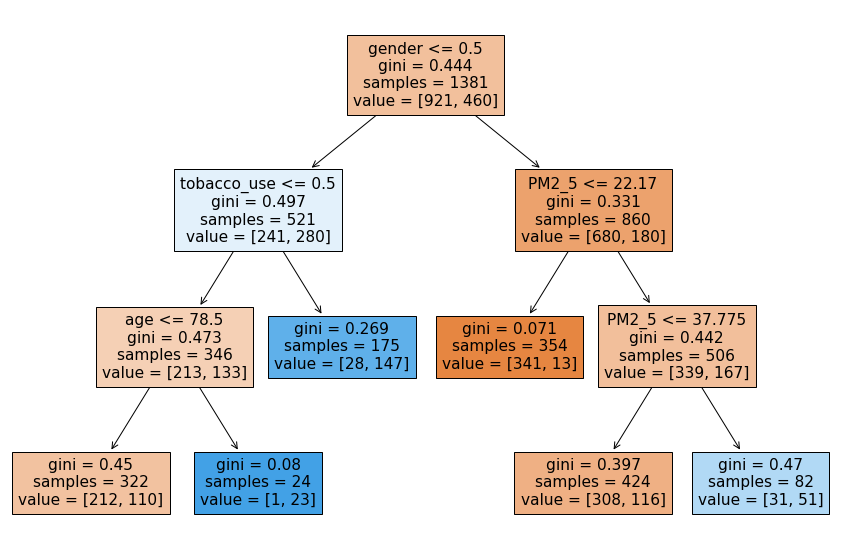

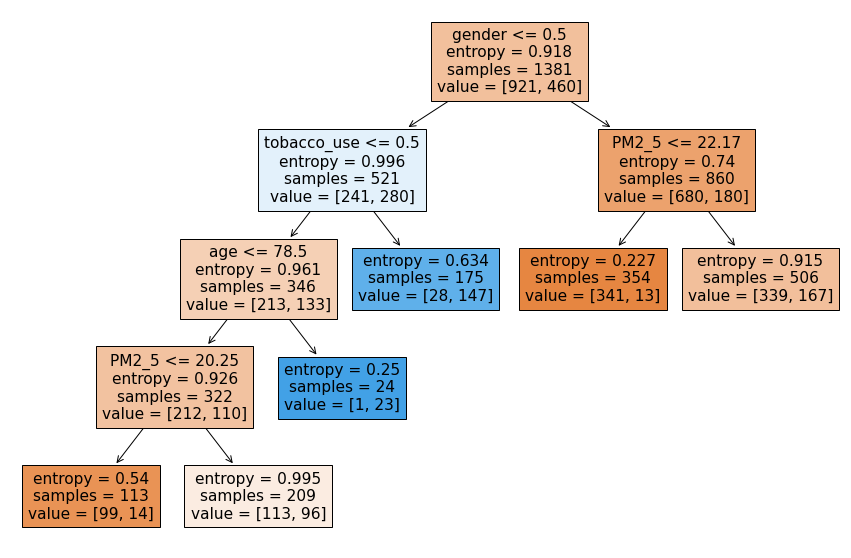

In [2]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split

pneumonia_data=pandas.read_csv('C:/Users/000110888/Desktop/pneumonia_data.csv')
code_gender={'M':1,'F':0}
code_tobacco_use={'yes':1,'no':0}
code_pneumonia={'yes':1,'no':0}

pneumonia_data['gender']=pneumonia_data['gender'].map(code_gender)
pneumonia_data['tobacco_use']=pneumonia_data['tobacco_use'].map(code_tobacco_use)
pneumonia_data['pneumonia']=pneumonia_data['pneumonia'].map(code_pneumonia)

X=pneumonia_data.iloc[:,0:4].values
y=pneumonia_data.iloc[:,4].values

#SPLITTING DATA INTO 80% TRAINING AND 20% TESTING SETS
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.20, 
random_state=786756)

#FITTING BINARY TREE WITH GINI SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='gini', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig = plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['gender','age','tobacco_use','PM2_5'], filled=True)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA 
y_pred=gini_tree.predict_proba(X_test)

#y_pred[::,1] are predicted probabilities of "yes"

total=len(y_pred)
trueclassrate=[]
cutoff=[]

for i in range(99):
    tp=0
    tn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        tp+=tp_ind
        tn+=tn_ind
    rate=(tp+tn)/total
    trueclassrate.append(rate)
    
df=pandas.DataFrame({'trueclassrate': trueclassrate,'cutoff': cutoff})
max_rate=max(trueclassrate)
optimal=df[df['trueclassrate']==max_rate]
print(optimal)

#FITTING BINARY TREE WITH ENTROPY SPLITTING CRITERION
gini_tree=DecisionTreeClassifier(max_leaf_nodes=6, criterion='entropy', random_state=199233)
gini_tree.fit=gini_tree.fit(X_train,y_train)

#PLOTTING FITTED TREE 
fig = plt.figure(figsize=(15,10))
tree.plot_tree(gini_tree.fit, feature_names=['gender','age','tobacco_use','PM2_5'], filled=True)

#COMPUTING PREDICTION ACCURACY FOR TESTING DATA 
y_pred=gini_tree.predict_proba(X_test)

#y_pred[::,1] are predicted probabilities of "yes"

total=len(y_pred)
trueclassrate=[]
cutoff=[]

for i in range(99):
    tp=0
    tn=0
    cutoff.append(0.01*(i+1))
    for sub1, sub2 in zip(y_pred[::,1], y_test):
        tp_ind=1 if (sub1>0.01*(i+1) and sub2==1) else 0
        tn_ind=1 if (sub1<0.01*(i+1) and sub2==0) else 0
        tp+=tp_ind
        tn+=tn_ind
    rate=(tp+tn)/total
    trueclassrate.append(rate)
    

df=pandas.DataFrame({'trueclassrate': trueclassrate,'cutoff': cutoff})
max_rate=max(trueclassrate)
optimal=df[df['trueclassrate']==max_rate]
print(optimal)